In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

df = pd.read_csv('/content/Data_Rev_Dataset - Sheet1.csv')


df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [7]:
# Computing descriptive statistics for the dataset
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5283 non-null   object 
 1   type               5283 non-null   object 
 2   description        5278 non-null   object 
 3   release_year       5283 non-null   int64  
 4   age_certification  2998 non-null   object 
 5   runtime            5283 non-null   int64  
 6   imdb_score         5283 non-null   float64
 7   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 330.3+ KB


In [9]:

df.isnull().sum()

,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_score,0
imdb_votes,16


In [10]:

df.duplicated().sum()

0

In [11]:

df['description'].replace(np.nan, 'No Data', inplace=True)


<ipython-input-11-f78c21d62900>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].replace(np.nan, 'No Data', inplace=True)


In [12]:
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [13]:
print(df['age_certification'].value_counts())

age_certification
TV-MA    792
R        548
TV-14    436
PG-13    424
PG       238
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
Name: count, dtype: int64


In [14]:

df['age_certification'] = df['age_certification'].fillna('Unknown')
print(df['age_certification'].value_counts())


age_certification
Unknown    2285
TV-MA       792
R           548
TV-14       436
PG-13       424
PG          238
TV-PG       172
G           105
TV-Y7       104
TV-Y         94
TV-G         72
NC-17        13
Name: count, dtype: int64


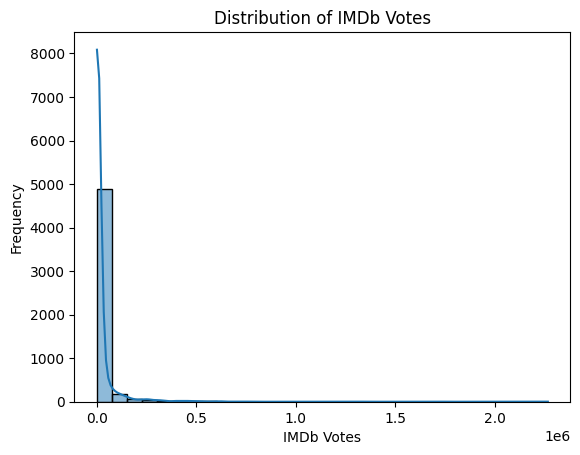

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['imdb_votes'].dropna(), bins=30, kde=True)
plt.title("Distribution of IMDb Votes")
plt.xlabel("IMDb Votes")
plt.ylabel("Frequency")
plt.show()


Percentage of missing IMDb votes after filling: 0.00%


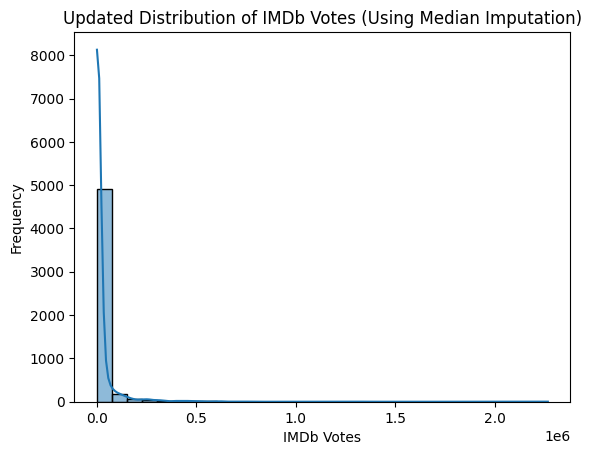

In [16]:

group_median = df.groupby(['type', 'age_certification'])['imdb_votes'].median()


def fill_votes_with_median(row):
    if pd.isna(row['imdb_votes']):
        return group_median.get((row['type'], row['age_certification']), 0)
    return row['imdb_votes']

df['imdb_votes'] = df.apply(fill_votes_with_median, axis=1)

missing_votes_percentage = df['imdb_votes'].isna().mean() * 100
print(f"Percentage of missing IMDb votes after filling: {missing_votes_percentage:.2f}%")

sns.histplot(df['imdb_votes'], bins=30, kde=True)
plt.title("Updated Distribution of IMDb Votes (Using Median Imputation)")
plt.xlabel("IMDb Votes")
plt.ylabel("Frequency")
plt.show()



In [17]:
df.head(1)

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0


In [18]:
df.isnull().sum()

,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
imdb_score,0
imdb_votes,0


In [19]:

df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [20]:
movies  = df.loc[df['type'] == 'MOVIE']
tv_shows = df.loc[df['type'] == 'SHOW']

In [21]:
tv_shows.runtime.value_counts()

,count
runtime,
24,107
45,91
44,78
23,75
25,72
...,...
95,1
122,1
92,1


In [22]:
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [23]:
movies.runtime.value_counts()

,count
runtime,
90,116
100,99
95,99
105,81
94,81
...,...
41,1
229,1
213,1


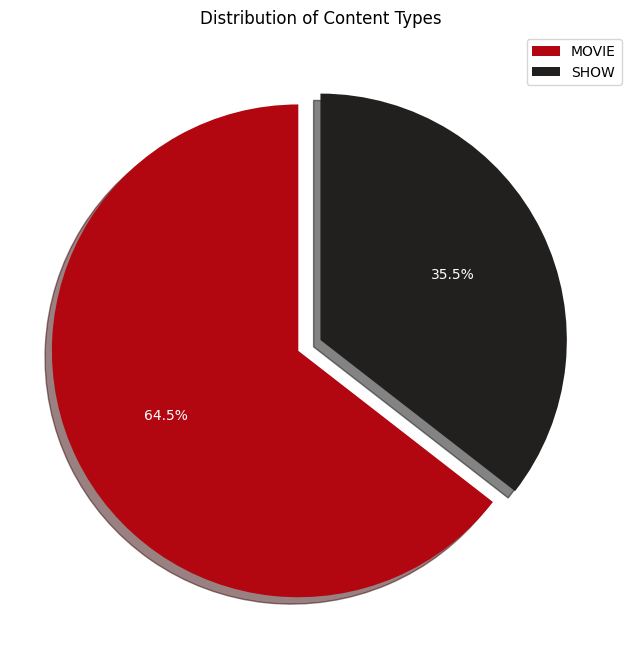

In [24]:

x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y) * 100).round(2)


mf_ratio = pd.DataFrame(r)
mf_ratio.rename({'type': '%'}, axis=1, inplace=True)


plt.figure(figsize=(12, 8))
colors = ['#b20710', '#221f1f']
explode = (0.1, 0)
plt.pie(mf_ratio['%'], labels=mf_ratio.index, autopct='%1.1f%%',
colors=colors, explode=explode, shadow=True, startangle=90,
textprops={'color': 'white'})

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()

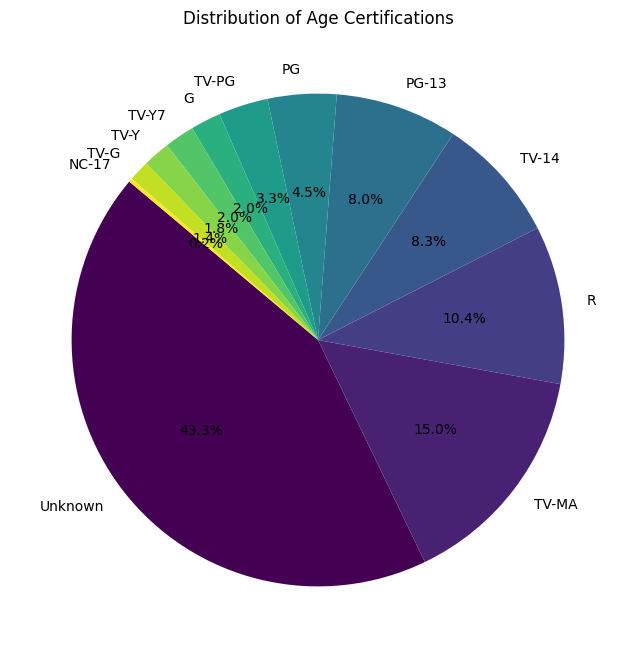

In [25]:
import matplotlib.pyplot as plt


age_certification_counts = df['age_certification'].value_counts()

plt.figure(figsize=(8, 8))
age_certification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis', legend=False)
plt.title('Distribution of Age Certifications')
plt.ylabel('')
plt.show()


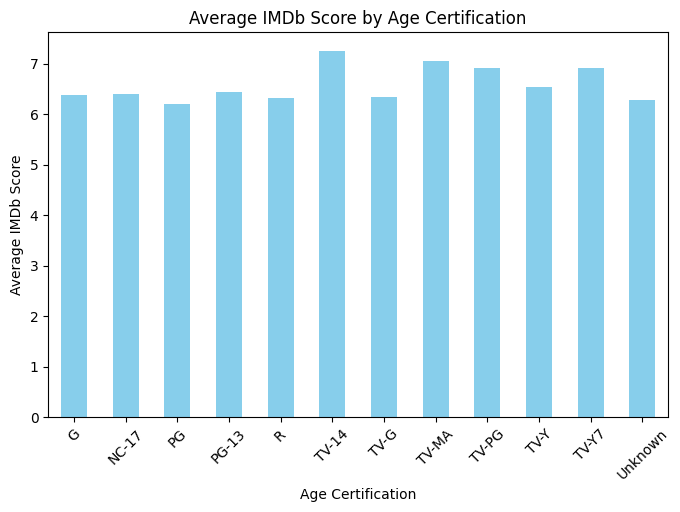

In [26]:

avg_imdb_score = df.groupby('age_certification')['imdb_score'].mean()


plt.figure(figsize=(8, 5))
avg_imdb_score.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Score by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()


In [27]:

avg_imdb_score = df.groupby('age_certification')['imdb_score'].mean()

print("Average IMDb Scores for Each Age Certification:")
print(avg_imdb_score)

Average IMDb Scores for Each Age Certification:
age_certification
G          6.393333
NC-17      6.400000
PG         6.208403
PG-13      6.444575
R          6.321168
TV-14      7.262615
TV-G       6.348611
TV-MA      7.065909
TV-PG      6.916860
TV-Y       6.547872
TV-Y7      6.913462
Unknown    6.277287
Name: imdb_score, dtype: float64


In [28]:
import pandas as pd


avg_imdb_score = df.groupby('age_certification')['imdb_score'].mean()

ranked_scores = avg_imdb_score.sort_values(ascending=False)

rankings_df = pd.DataFrame({
    'Rank': range(1, len(ranked_scores) + 1),
    'Age_Certification': ranked_scores.index,
    'Average_IMDb_Score': ranked_scores.values
})


rankings_df['Average_IMDb_Score'] = rankings_df['Average_IMDb_Score'].round(2)

print("\nIMDb Score Rankings by Age Certification:")
print("==========================================")
for _, row in rankings_df.iterrows():
    print(f"Rank #{row['Rank']}: {row['Age_Certification']}")
    print(f"Average IMDb Score: {row['Average_IMDb_Score']}")
    print("------------------------------------------")




IMDb Score Rankings by Age Certification:
Rank #1: TV-14
Average IMDb Score: 7.26
------------------------------------------
Rank #2: TV-MA
Average IMDb Score: 7.07
------------------------------------------
Rank #3: TV-PG
Average IMDb Score: 6.92
------------------------------------------
Rank #4: TV-Y7
Average IMDb Score: 6.91
------------------------------------------
Rank #5: TV-Y
Average IMDb Score: 6.55
------------------------------------------
Rank #6: PG-13
Average IMDb Score: 6.44
------------------------------------------
Rank #7: NC-17
Average IMDb Score: 6.4
------------------------------------------
Rank #8: G
Average IMDb Score: 6.39
------------------------------------------
Rank #9: TV-G
Average IMDb Score: 6.35
------------------------------------------
Rank #10: R
Average IMDb Score: 6.32
------------------------------------------
Rank #11: Unknown
Average IMDb Score: 6.28
------------------------------------------
Rank #12: PG
Average IMDb Score: 6.21
-------------

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


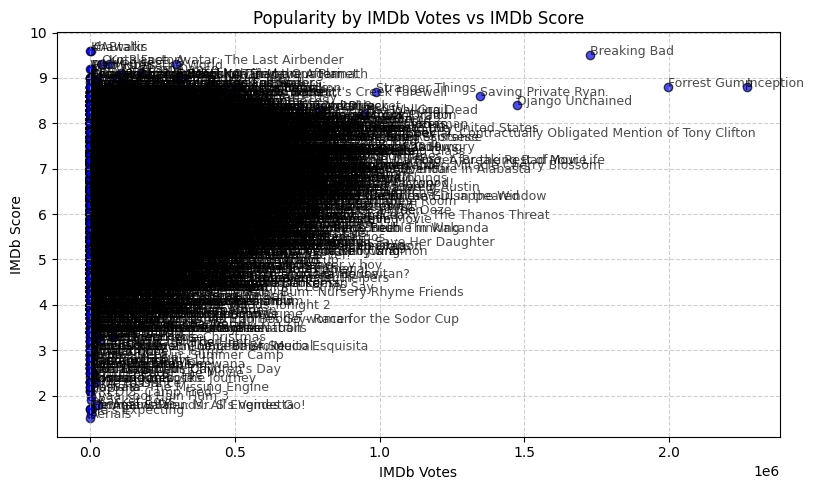

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(df['imdb_votes'], df['imdb_score'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Popularity by IMDb Votes vs IMDb Score')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

s
for i, title in enumerate(df['title']):
    plt.annotate(title, (df['imdb_votes'][i], df['imdb_score'][i]), fontsize=9, alpha=0.7)

plt.show()

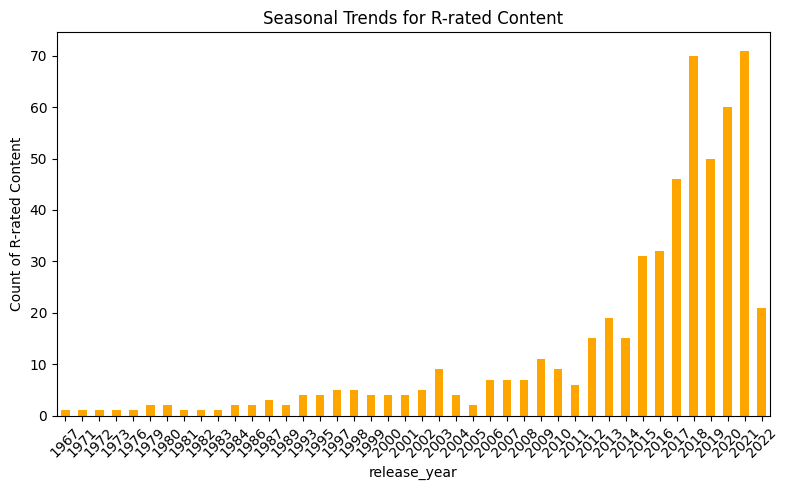

In [30]:

r_content = df[df['age_certification'] == 'R']
seasonal_trends = r_content.groupby('release_year')['title'].count()
plt.figure(figsize=(8, 5))
seasonal_trends.sort_index().plot(kind='bar', color='orange')
plt.title('Seasonal Trends for R-rated Content')
plt.xlabel('release_year')
plt.ylabel('Count of R-rated Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
avg_r_rating = df[df['age_certification'] == 'R']['imdb_score'].mean()
avg_non_r_rating = df[df['age_certification'] != 'R']['imdb_score'].mean()
print(f"Average IMDb Score for R-rated Content: {avg_r_rating}")
print(f"Average IMDb Score for Non-R-rated Content: {avg_non_r_rating}")

Average IMDb Score for R-rated Content: 6.321167883211679
Average IMDb Score for Non-R-rated Content: 6.558014783526927


In [32]:
avg_r_voting = df[df['age_certification'] == 'R']['imdb_votes'].mean()
avg_non_r_voting = df[df['age_certification'] != 'R']['imdb_votes'].mean()
print(f"Average IMDb Votes for R-rated Content: {avg_r_voting}")
print(f"Average IMDb Votes for Non-R-rated Content: {avg_non_r_voting}")

Average IMDb Votes for R-rated Content: 77348.84306569344
Average IMDb Votes for Non-R-rated Content: 17113.165997888067


<function matplotlib.pyplot.show(close=None, block=None)>

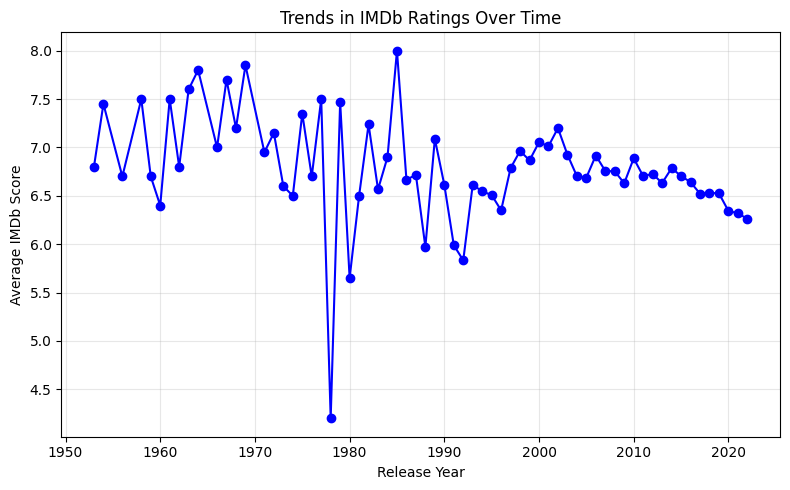

In [33]:
ratings_over_time = df.groupby('release_year')['imdb_score'].mean()
plt.figure(figsize=(8, 5))
ratings_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Trends in IMDb Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show

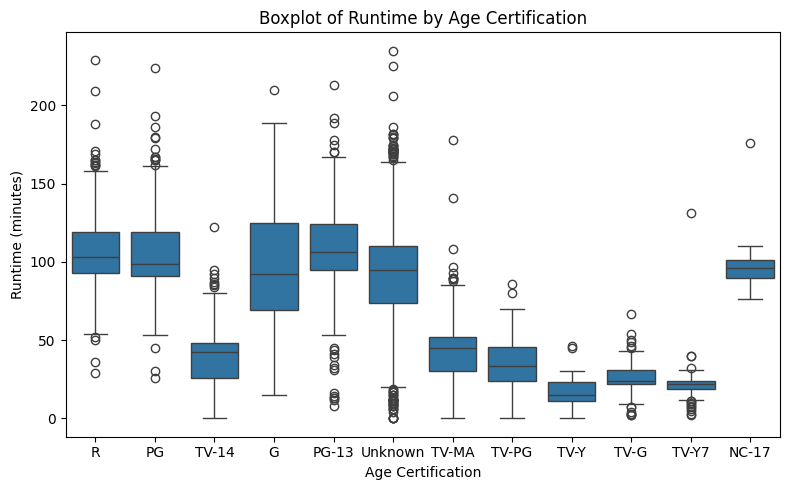

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_certification', y='runtime', data=df)
plt.title('Boxplot of Runtime by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Runtime (minutes)')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

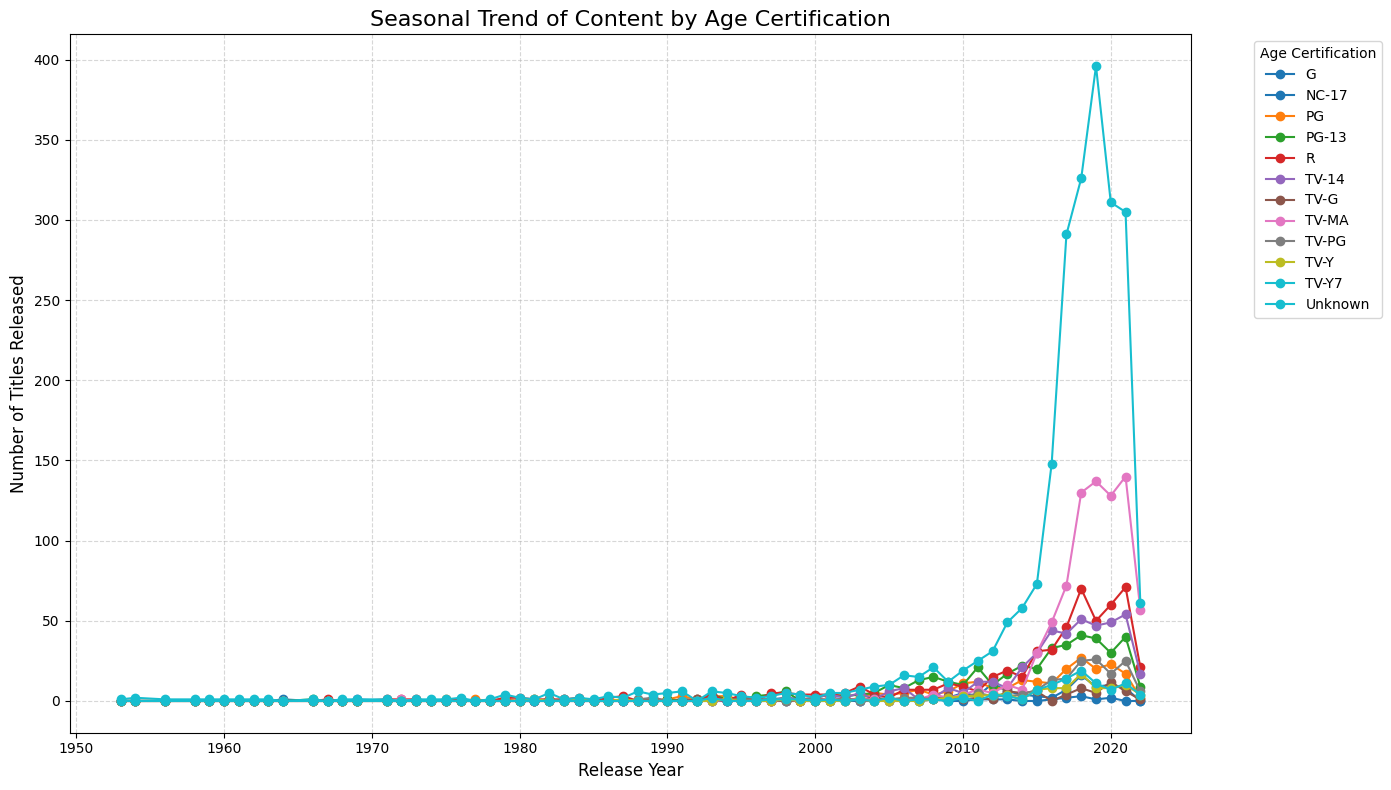

In [35]:


seasonal_trend = df.groupby(['release_year', 'age_certification']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
seasonal_trend.plot(kind='line', figsize=(14, 8), marker='o', colormap='tab10')

plt.title('Seasonal Trend of Content by Age Certification', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Age Certification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


<Figure size 1200x800 with 0 Axes>

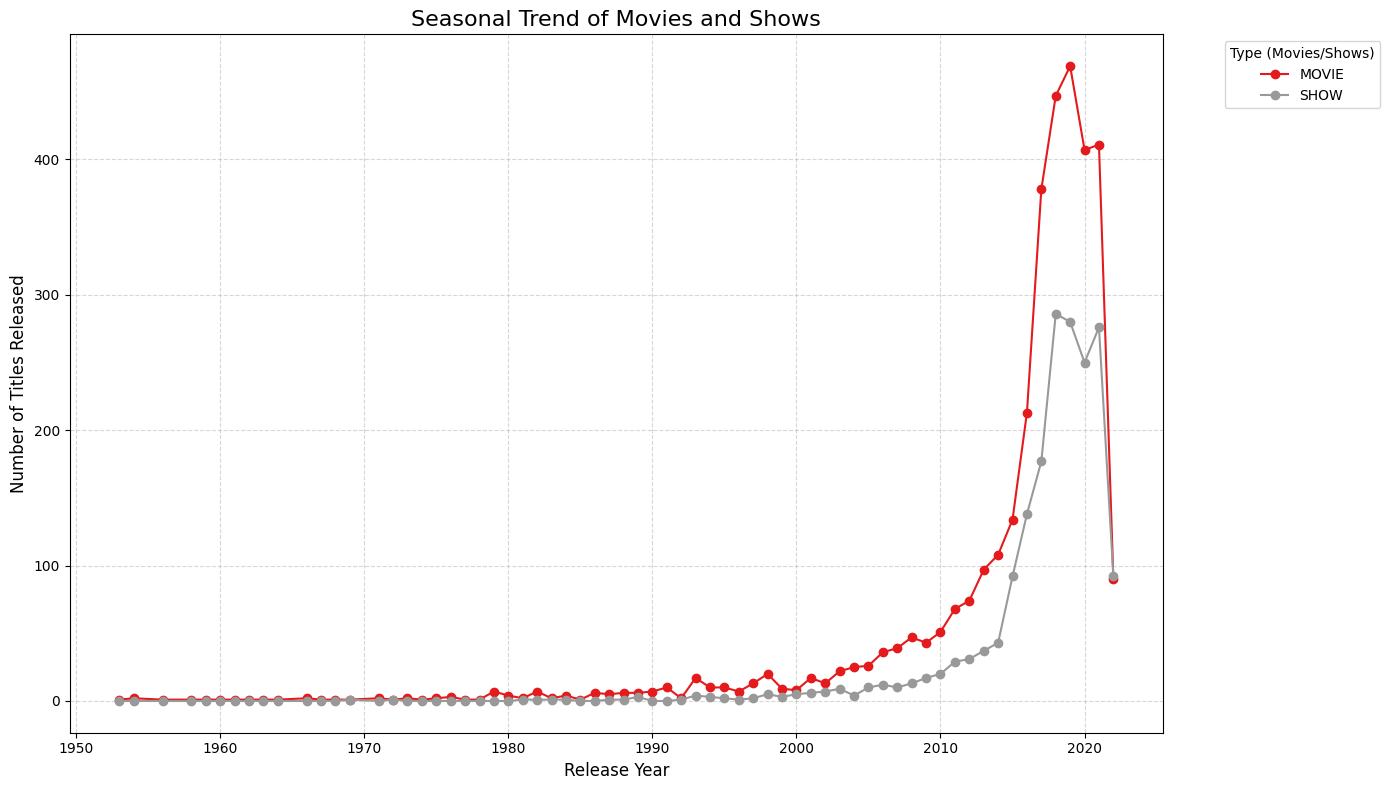

In [36]:



seasonal_trend_by_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
seasonal_trend_by_type.plot(kind='line', figsize=(14, 8), marker='o', colormap='Set1')


plt.title('Seasonal Trend of Movies and Shows', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Type (Movies/Shows)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [37]:
df.head(10)

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0
5,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,7.7,153463.0
6,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,7.8,94121.0
7,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,5.8,69053.0
8,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,7.7,111189.0
9,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,7.3,16168.0


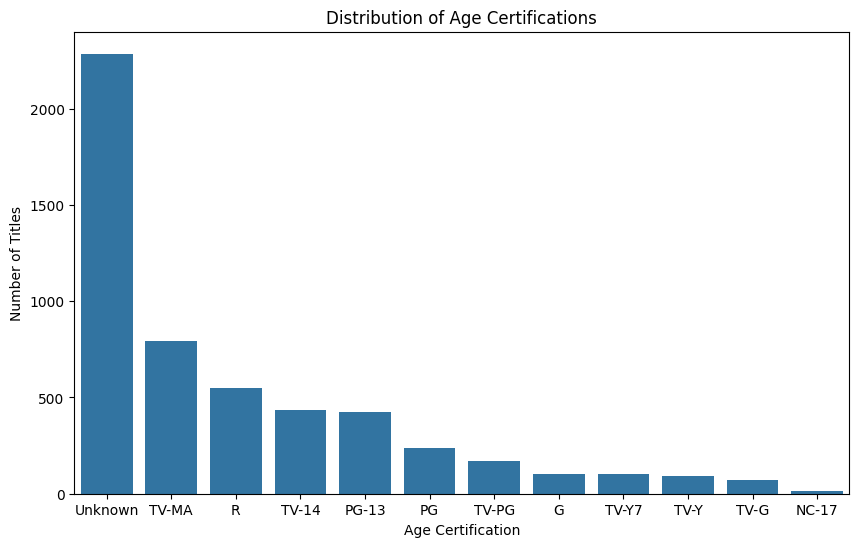

In [38]:
age_cert_counts = df['age_certification'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cert_counts.index, y=age_cert_counts.values)
plt.title('Distribution of Age Certifications')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.show()

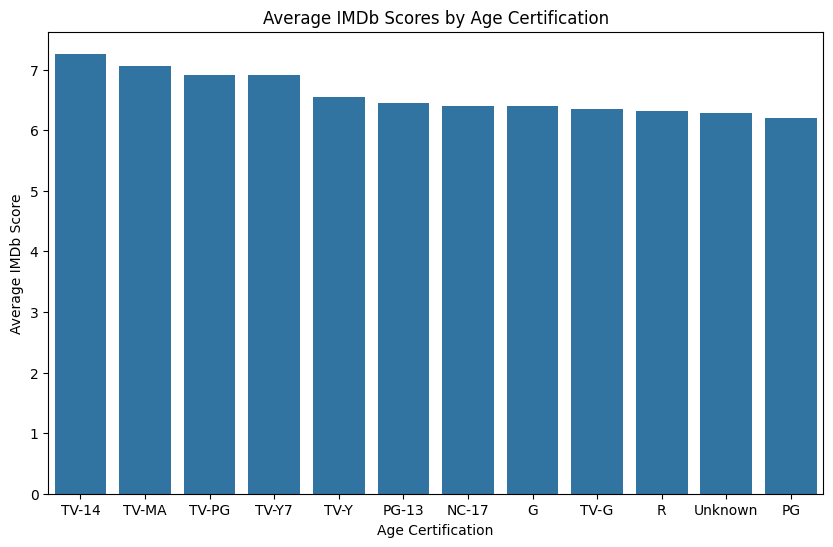

In [39]:
avg_imdb_scores = df.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_imdb_scores.index, y=avg_imdb_scores.values)
plt.title('Average IMDb Scores by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.show()

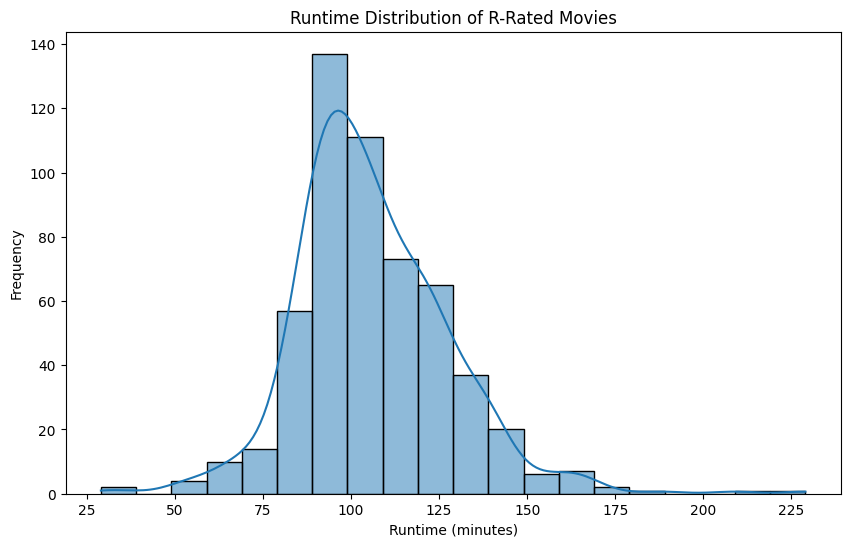

In [40]:
r_rated = df[df['age_certification'] == 'R']

plt.figure(figsize=(10, 6))
sns.histplot(r_rated['runtime'], bins=20, kde=True)
plt.title('Runtime Distribution of R-Rated Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


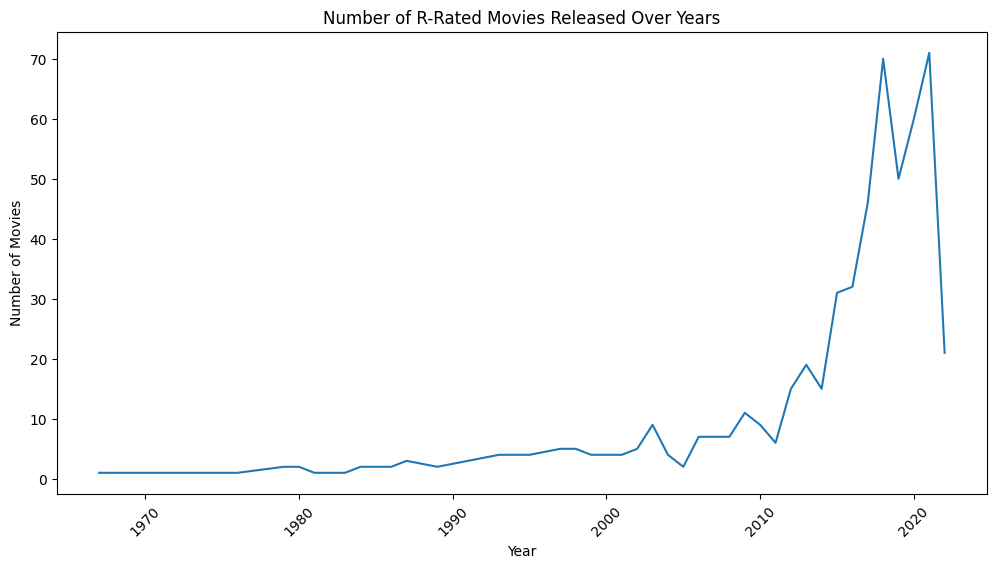

In [41]:
r_rated_by_year = r_rated['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=r_rated_by_year.index, y=r_rated_by_year.values)
plt.title('Number of R-Rated Movies Released Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


<ipython-input-42-7c038fea9522>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Certification', y='Mean Votes', data=mean_votes_by_certification, palette='viridis')


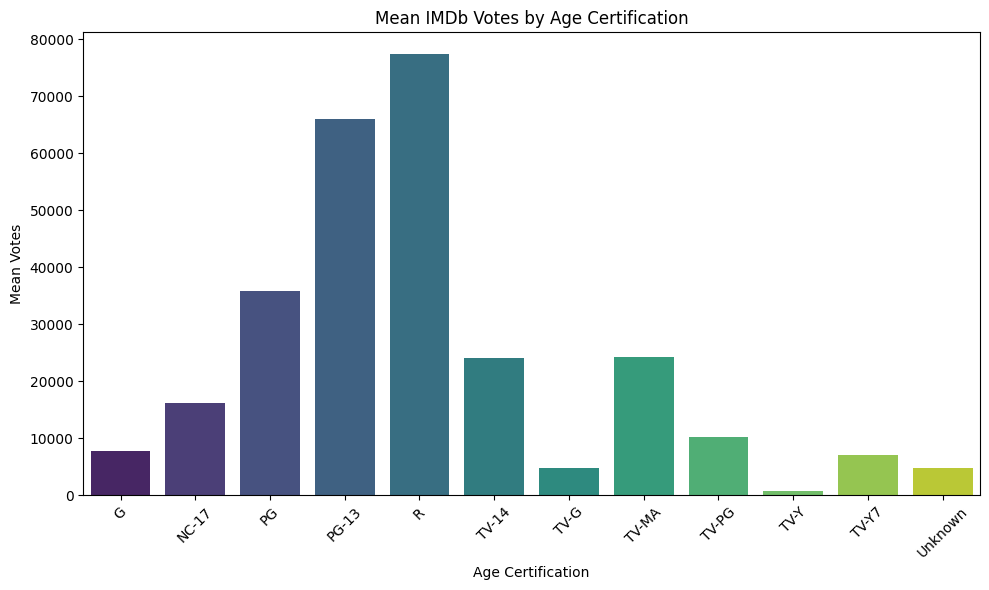

In [42]:



mean_votes_by_certification = df.groupby('age_certification')['imdb_votes'].mean().reset_index()


mean_votes_by_certification.columns = ['Age Certification', 'Mean Votes']


plt.figure(figsize=(10, 6))
sns.barplot(x='Age Certification', y='Mean Votes', data=mean_votes_by_certification, palette='viridis')


plt.title('Mean IMDb Votes by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Mean Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

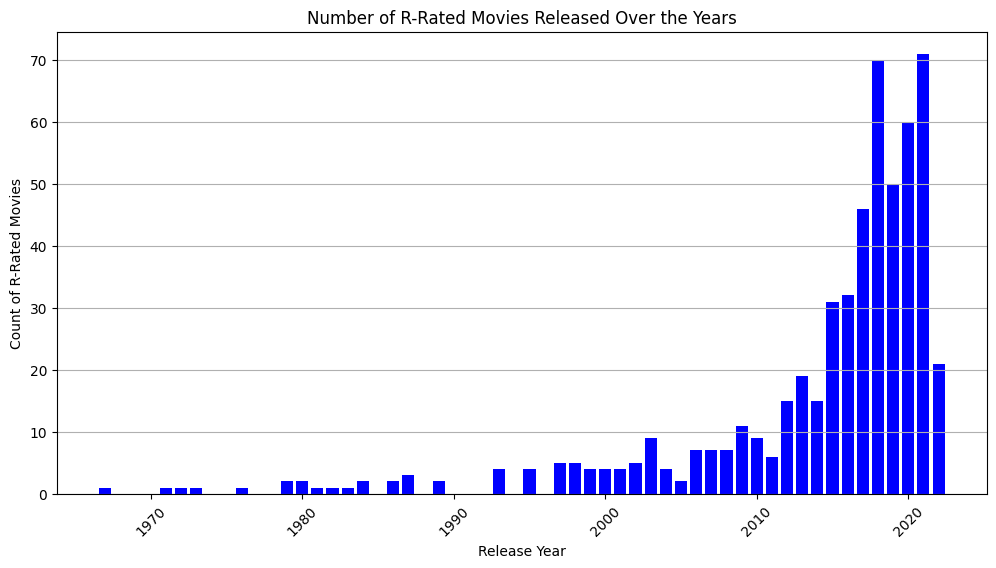

In [43]:
r_rated_df = df[df['age_certification'] == 'R']

r_rated_counts = r_rated_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(r_rated_counts.index, r_rated_counts['MOVIE'], color='blue')
plt.title('Number of R-Rated Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count of R-Rated Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


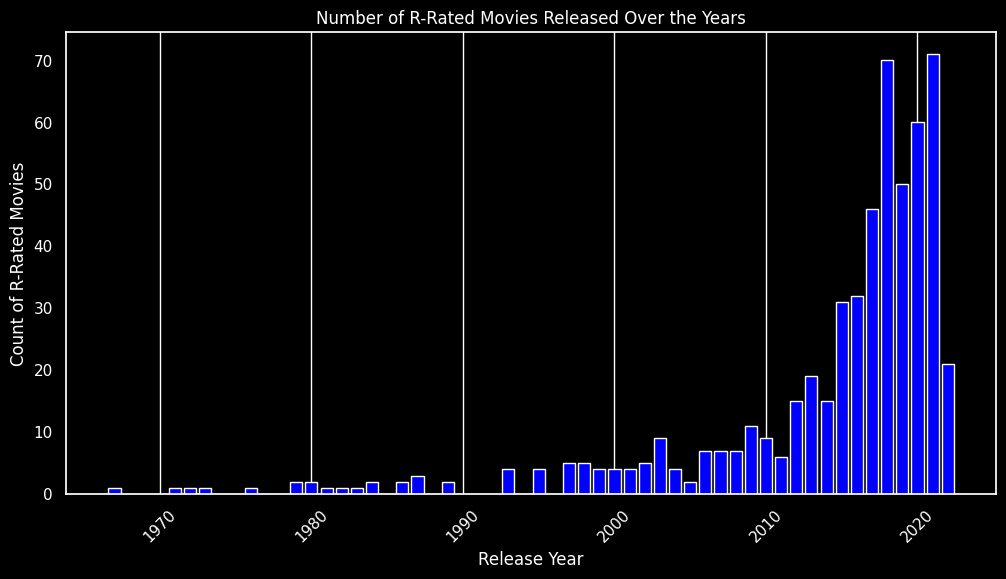

No R-rated shows found.


In [65]:

if 'MOVIE' in r_rated_counts.columns:
    plt.figure(figsize=(12, 6))
    plt.bar(r_rated_counts.index, r_rated_counts['MOVIE'], color='blue')
    plt.title('Number of R-Rated Movies Released Over the Years')
    plt.xlabel('Release Year')
    plt.ylabel('Count of R-Rated Movies')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No R-rated movies found.")

if 'SHOW' in r_rated_counts.columns:
    plt.figure(figsize=(12, 6))
    plt.bar(r_rated_counts.index, r_rated_counts['SHOW'], color='orange')
    plt.title('Number of R-Rated Shows Released Over the Years')
    plt.xlabel('Release Year')
    plt.ylabel('Count of R-Rated Shows')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No R-rated shows found.")


type                 MOVIE          SHOW
release_year                            
1953            231.000000           NaN
1954          21796.000000           NaN
1956            590.000000           NaN
1958           4385.000000           NaN
1959             78.000000           NaN
...                    ...           ...
2018           9393.617450   9254.433566
2019          12178.569296  10881.503571
2020          10007.089681   9879.148000
2021          10706.041363   8218.210145
2022           8444.466667   4231.782609

[66 rows x 2 columns]


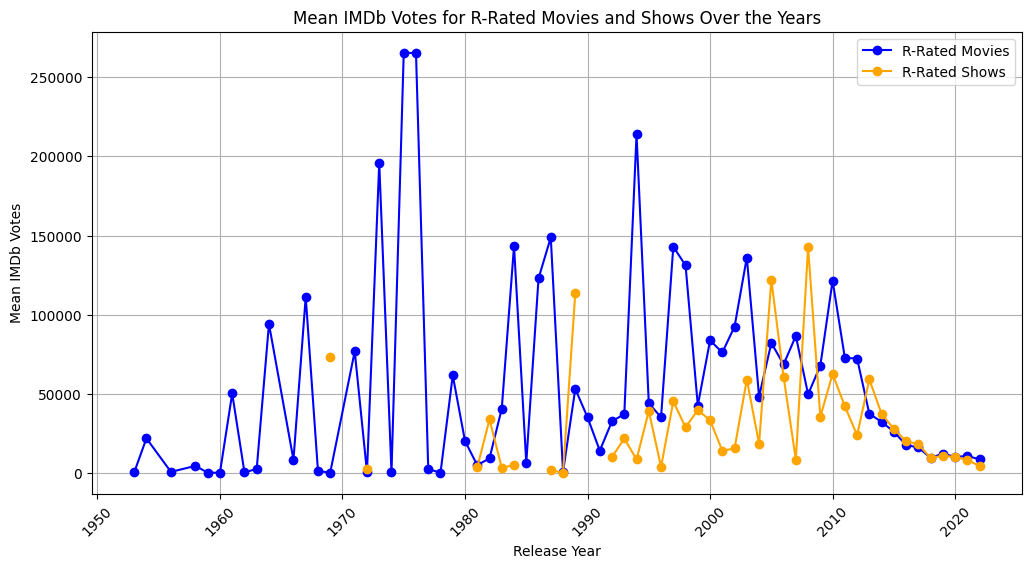

In [45]:
r_rated_df = df

mean_votes = r_rated_df.groupby(['release_year', 'type'])['imdb_votes'].mean().unstack()


print(mean_votes)

plt.figure(figsize=(12, 6))
if 'MOVIE' in mean_votes.columns:
    plt.plot(mean_votes.index, mean_votes['MOVIE'], marker='o', color='blue', label='R-Rated Movies')
else:
    print("No R-rated movies found.")

if 'SHOW' in mean_votes.columns:
    plt.plot(mean_votes.index, mean_votes['SHOW'], marker='o', color='orange', label='R-Rated Shows')
else:
    print("No R-rated shows found.")

plt.title('Mean IMDb Votes for R-Rated Movies and Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Mean IMDb Votes')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


age_certification         G         NC-17            PG         PG-13  \
release_year                                                            
1953                    NaN           NaN           NaN           NaN   
1954                    NaN           NaN           NaN           NaN   
1956                    NaN           NaN           NaN           NaN   
1958                    NaN           NaN           NaN           NaN   
1959                    NaN           NaN           NaN           NaN   
...                     ...           ...           ...           ...   
2018               2371.625   4850.333333   8272.518519  17339.097561   
2019               1984.000  13680.000000  13589.550000  21990.743590   
2020               1669.300  17919.500000   7837.565217  25691.950000   
2021               4748.500           NaN  14149.176471  19378.600000   
2022                    NaN           NaN   9394.000000  24207.000000   

age_certification             R         TV-14     

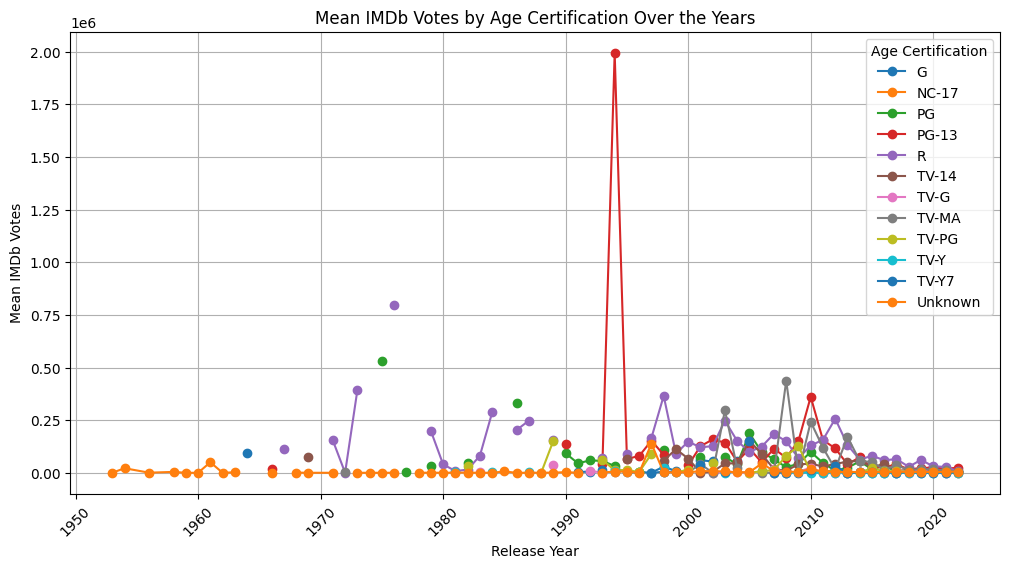

In [46]:

df['imdb_votes'] = pd.to_numeric(df['imdb_votes'], errors='coerce')


mean_votes = df.groupby(['release_year', 'age_certification'])['imdb_votes'].mean().unstack()

print(mean_votes)

plt.figure(figsize=(12, 6))
for age_cert in mean_votes.columns:
    plt.plot(mean_votes.index, mean_votes[age_cert], marker='o', label=age_cert)

plt.title('Mean IMDb Votes by Age Certification Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Mean IMDb Votes')
plt.xticks(rotation=45)
plt.legend(title='Age Certification')
plt.grid()
plt.show()


release_year
1953        231.0
1954      43592.0
1956        590.0
1958       4385.0
1959         78.0
          ...    
2018    6845715.0
2019    8758570.0
2020    6542672.5
2021    6668409.0
2022    1149326.0
Name: imdb_votes, Length: 66, dtype: float64


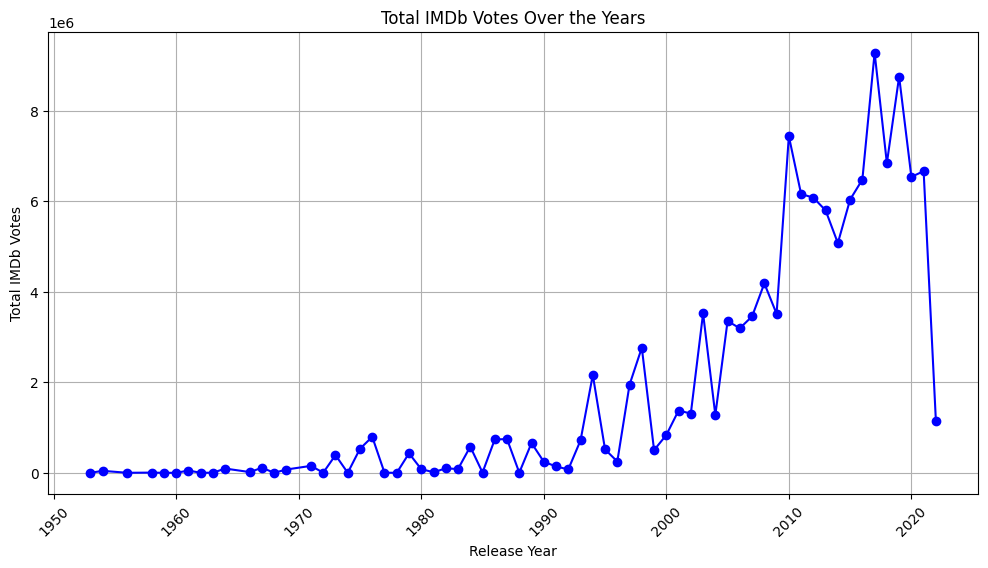

In [47]:

df['imdb_votes'] = pd.to_numeric(df['imdb_votes'], errors='coerce')


total_votes_by_year = df.groupby('release_year')['imdb_votes'].sum()

print(total_votes_by_year)

plt.figure(figsize=(12, 6))
plt.plot(total_votes_by_year.index, total_votes_by_year.values, marker='o', color='blue')
plt.title('Total IMDb Votes Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total IMDb Votes')
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-58-2cc539260fb7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='runtime', data=df, palette=["#E50914", "#B81D24"])  # Netflix red shades


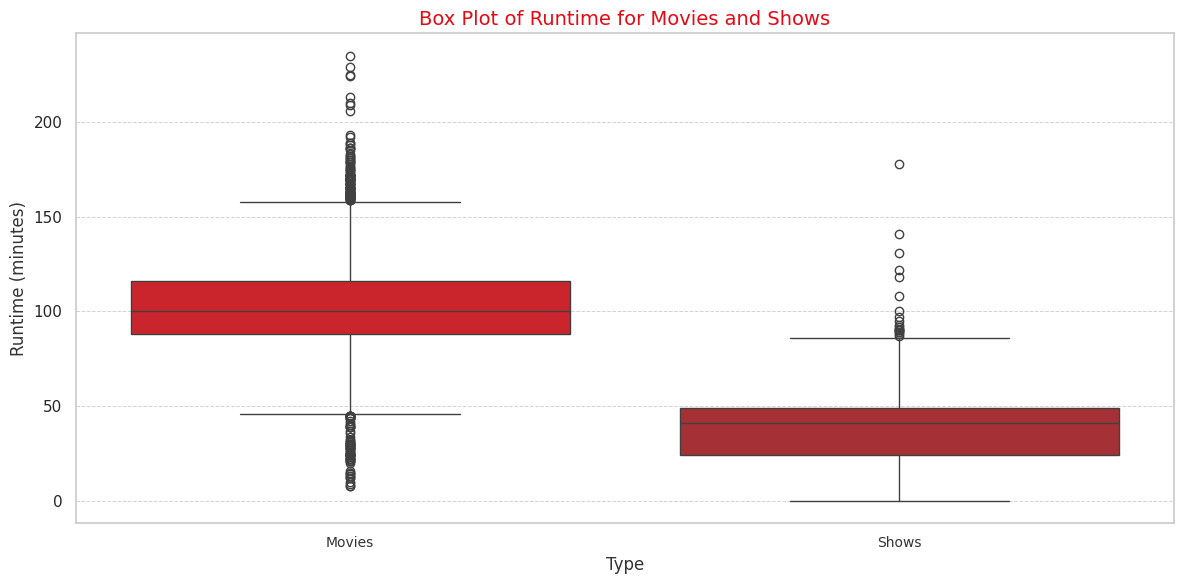

In [58]:

sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "lightgray"})


plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='runtime', data=df, palette=["#E50914", "#B81D24"])
plt.title('Box Plot of Runtime for Movies and Shows', fontsize=14, color="#E50914")
plt.xlabel('Type', fontsize=12, color="#333333")
plt.ylabel('Runtime (minutes)', fontsize=12, color="#333333")
plt.xticks(ticks=[0, 1], labels=['Movies', 'Shows'], fontsize=10, color="#333333")
plt.grid(axis='y', color="lightgray", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()


<ipython-input-59-03bddad950f5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='runtime', data=highly_rated, palette=["#E50914", "#B81D24"])  # Netflix red shades


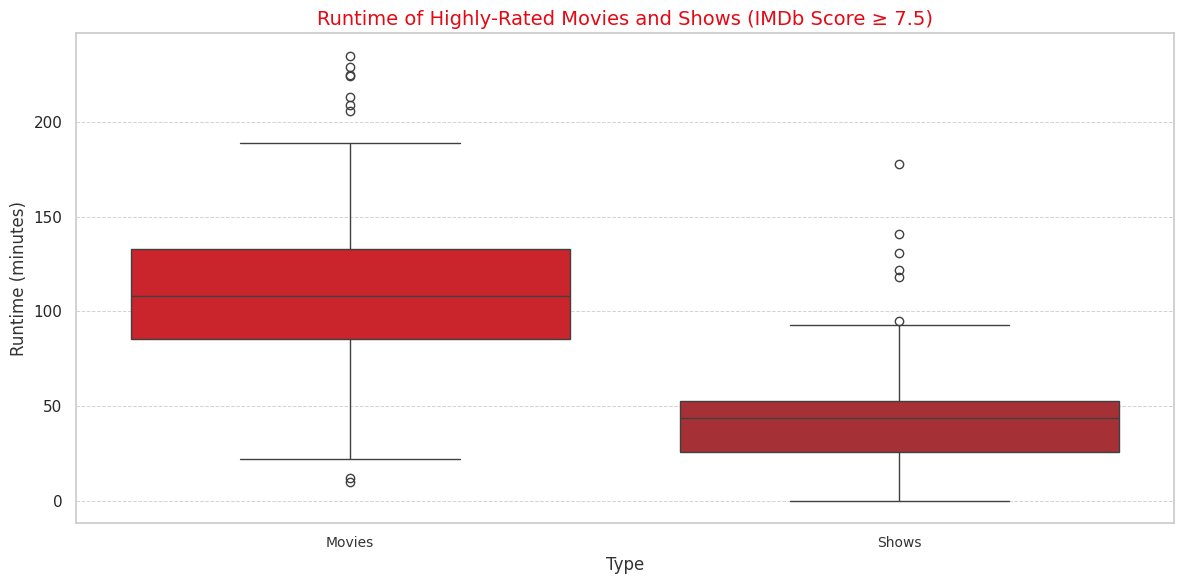

In [59]:
high_rating_threshold = 7.5


highly_rated = df[df['imdb_score'] >= high_rating_threshold]


plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='runtime', data=highly_rated, palette=["#E50914", "#B81D24"])
plt.title('Runtime of Highly-Rated Movies and Shows (IMDb Score ≥ 7.5)', fontsize=14, color="#E50914")
plt.xlabel('Type', fontsize=12, color="#333333")
plt.ylabel('Runtime (minutes)', fontsize=12, color="#333333")
plt.xticks(ticks=[0, 1], labels=['Movies', 'Shows'], fontsize=10, color="#333333")
plt.grid(axis='y', color="lightgray", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

type age_certification     MOVIE      SHOW
0                    G  6.393333       NaN
1                NC-17  6.400000       NaN
2                   PG  6.208403       NaN
3                PG-13  6.444575       NaN
4                    R  6.321168       NaN
5                TV-14       NaN  7.262615
6                 TV-G       NaN  6.348611
7                TV-MA       NaN  7.065909
8                TV-PG       NaN  6.916860
9                 TV-Y       NaN  6.547872
10               TV-Y7       NaN  6.913462
11             Unknown  6.215969  6.896117


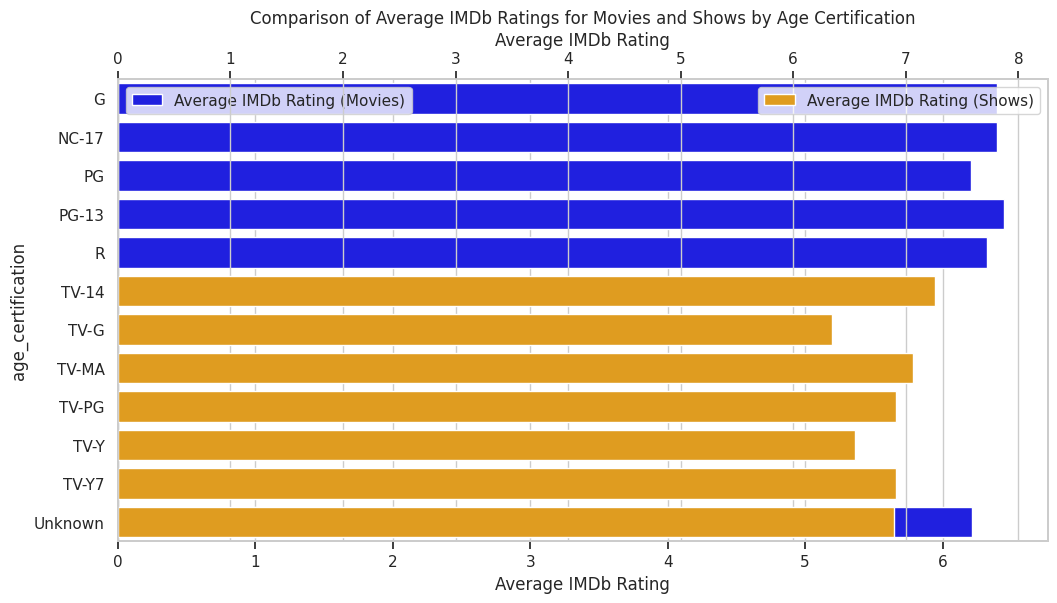

In [49]:

average_ratings = df.groupby(['age_certification', 'type'])['imdb_score'].mean().unstack()

average_ratings = average_ratings.reset_index()
print(average_ratings)

sns.set(style="whitegrid")


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x=average_ratings['MOVIE'], y=average_ratings['age_certification'], ax=ax1, color='blue', label='Average IMDb Rating (Movies)', orient='h')

ax2 = ax1.twiny()
sns.barplot(x=average_ratings['SHOW'], y=average_ratings['age_certification'], ax=ax2, color='orange', label='Average IMDb Rating (Shows)', orient='h')


ax2.set_xlim(0, average_ratings[['MOVIE', 'SHOW']].max().max() + 1)


ax1.set_xlabel('Average IMDb Rating')
ax2.set_xlabel('Average IMDb Rating')
ax1.set_title('Comparison of Average IMDb Ratings for Movies and Shows by Age Certification')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [50]:

correlation_matrix = df[['imdb_score', 'imdb_votes', 'runtime']].corr()

print(correlation_matrix)


            imdb_score  imdb_votes   runtime
imdb_score    1.000000    0.189530 -0.159297
imdb_votes    0.189530    1.000000  0.138851
runtime      -0.159297    0.138851  1.000000


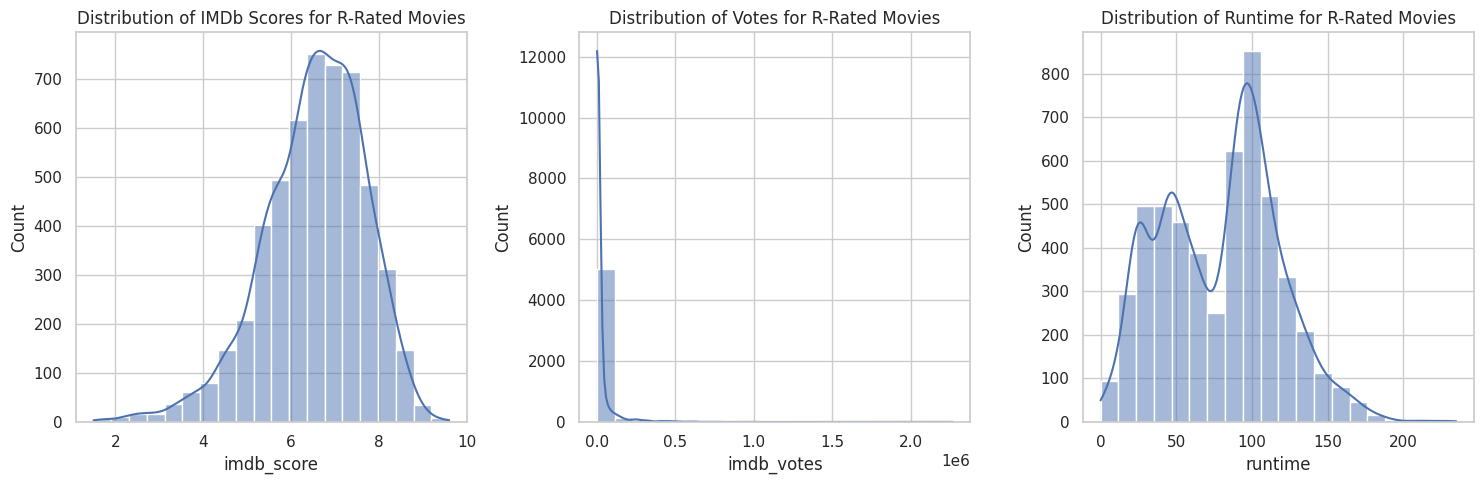

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(r_rated_df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores for R-Rated Movies')

plt.subplot(1, 3, 2)
sns.histplot(r_rated_df['imdb_votes'], bins=20, kde=True)
plt.title('Distribution of Votes for R-Rated Movies')

plt.subplot(1, 3, 3)
sns.histplot(r_rated_df['runtime'], bins=20, kde=True)
plt.title('Distribution of Runtime for R-Rated Movies')

plt.tight_layout()
plt.show()


In [52]:

age_cert_analysis = df.groupby('age_certification').agg({
    'imdb_score': 'mean',
    'imdb_votes': 'sum'
}).reset_index()

print(age_cert_analysis)

   age_certification  imdb_score  imdb_votes
0                  G    6.393333    808385.0
1              NC-17    6.400000    209965.0
2                 PG    6.208403   8518896.0
3              PG-13    6.444575  27963805.0
4                  R    6.321168  42387166.0
5              TV-14    7.262615  10466379.0
6               TV-G    6.348611    339340.0
7              TV-MA    7.065909  19179596.0
8              TV-PG    6.916860   1752578.0
9               TV-Y    6.547872     67809.0
10             TV-Y7    6.913462    731830.0
11           Unknown    6.277287  10992258.0


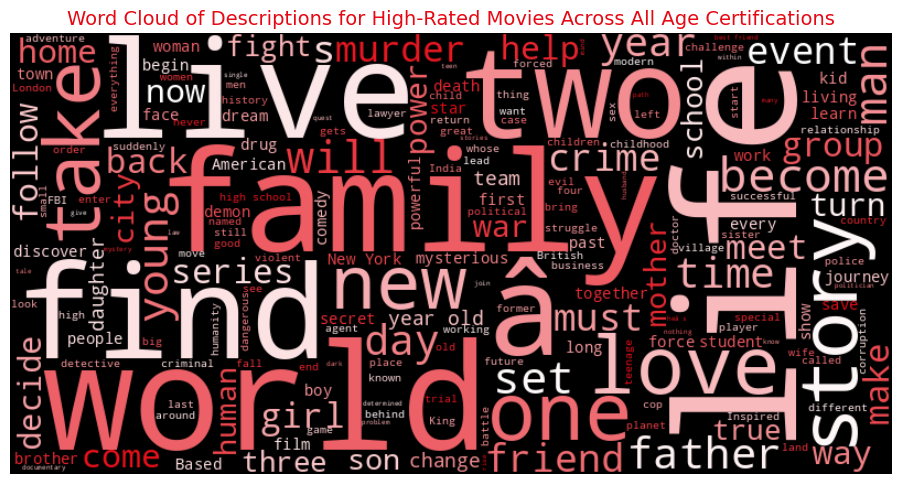

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
netflix_cmap = LinearSegmentedColormap.from_list("NetflixTheme", ["#E50914", "#FFFFFF"])


descriptions = ' '.join(high_rated_df['description'].dropna().tolist())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap=netflix_cmap
).generate(descriptions)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions for High-Rated Movies Across All Age Certifications', color="#E50914", fontsize=14)
plt.tight_layout()
plt.show()

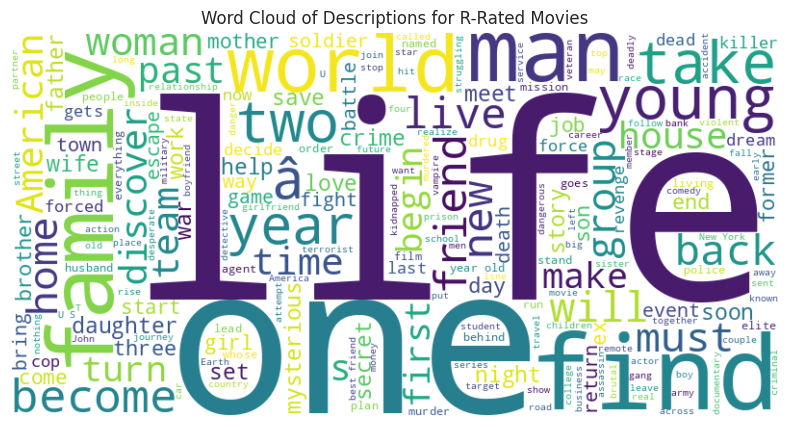

In [54]:
r_rated_df = df[df['age_certification'] == 'R']



wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions for R-Rated Movies')
plt.show()

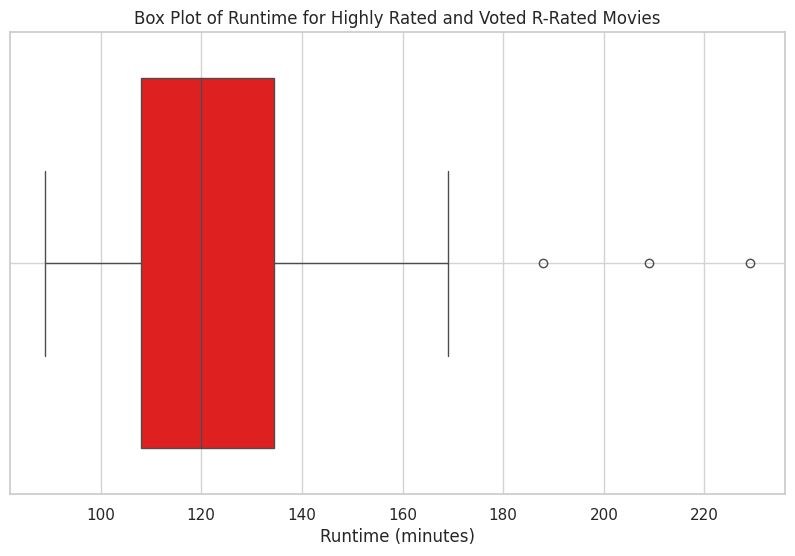

In [60]:

high_rating_threshold = r_rated_df['imdb_score'].quantile(0.75)  # Top 25% ratings
high_votes_threshold = r_rated_df['imdb_votes'].quantile(0.75)    # Top 25% votes

high_rated_movies = r_rated_df[(r_rated_df['imdb_score'] >= high_rating_threshold) &
                                (r_rated_df['imdb_votes'] >= high_votes_threshold)]
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

sns.boxplot(x='runtime', data=high_rated_movies, color='red')

plt.xlabel('Runtime (minutes)')
plt.title('Box Plot of Runtime for Highly Rated and Voted R-Rated Movies')
plt.grid(axis='y')
plt.show()


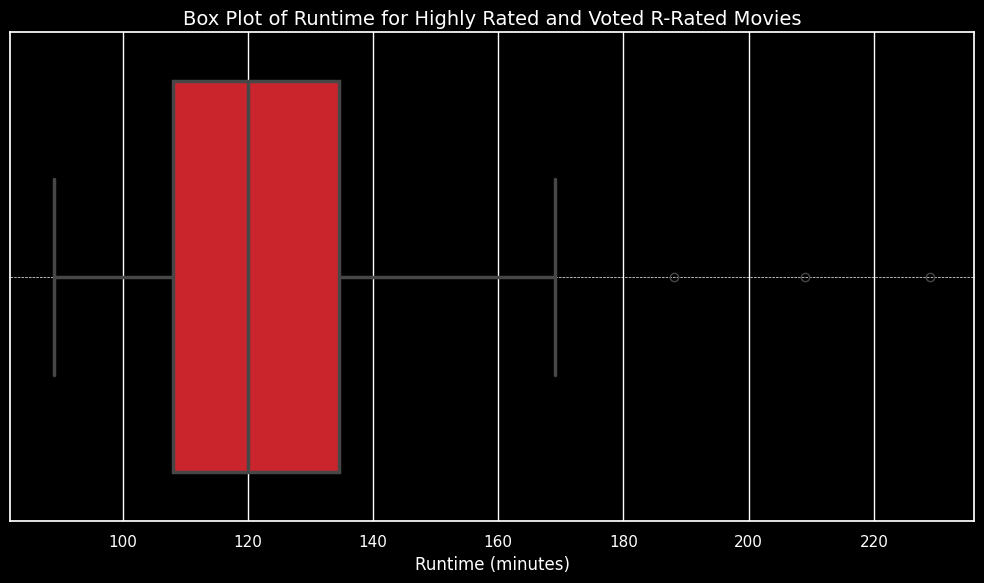

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid")
plt.style.use('dark_background')


plt.figure(figsize=(10, 6))


sns.boxplot(x='runtime', data=high_rated_movies, color='#E50914', linewidth=2.5)

plt.xlabel('Runtime (minutes)', color='white', fontsize=12)
plt.title('Box Plot of Runtime for Highly Rated and Voted R-Rated Movies', color='white', fontsize=14)


plt.grid(color='white', linestyle='--', linewidth=0.5, axis='y')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()


In [56]:
movies_df = df[df['type'] == 'MOVIE']
shows_df = df[df['type'] == 'SHOW']

highest_voted_movie = movies_df.loc[movies_df['imdb_votes'].idxmax()]


highest_voted_show = shows_df.loc[shows_df['imdb_votes'].idxmax()]


print("Highest Voted Movie:")
print(f"Title: {highest_voted_movie['title']}")
print(f"IMDb Rating: {highest_voted_movie['imdb_score']}")
print(f"Votes: {highest_voted_movie['imdb_votes']}")
print(f"Runtime: {highest_voted_movie['runtime']} minutes")

print("\nHighest Voted Show:")
print(f"Title: {highest_voted_show['title']}")
print(f"IMDb Rating: {highest_voted_show['imdb_score']}")
print(f"Votes: {highest_voted_show['imdb_votes']}")
print(f"Runtime: {highest_voted_show['runtime']} minutes")

Highest Voted Movie:
Title: Inception
IMDb Rating: 8.8
Votes: 2268288.0
Runtime: 148 minutes

Highest Voted Show:
Title: Breaking Bad
IMDb Rating: 9.5
Votes: 1727694.0
Runtime: 48 minutes
